In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.rename(columns={'blue':'bt','four_g':'4G','talk_time':'battery_life','three_g':'3G'},inplace=True)

# EDA

In [4]:
df.columns = df.columns.str.upper()
df

,BATTERY_POWER,BT,CLOCK_SPEED,DUAL_SIM,FC,4G,INT_MEMORY,M_DEP,MOBILE_WT,N_CORES,PC,PX_HEIGHT,PX_WIDTH,RAM,SC_H,SC_W,BATTERY_LIFE,3G,TOUCH_SCREEN,WIFI,PRICE_RANGE
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BATTERY_POWER  2000 non-null   int64  
 1   BT             2000 non-null   int64  
 2   CLOCK_SPEED    2000 non-null   float64
 3   DUAL_SIM       2000 non-null   int64  
 4   FC             2000 non-null   int64  
 5   4G             2000 non-null   int64  
 6   INT_MEMORY     2000 non-null   int64  
 7   M_DEP          2000 non-null   float64
 8   MOBILE_WT      2000 non-null   int64  
 9   N_CORES        2000 non-null   int64  
 10  PC             2000 non-null   int64  
 11  PX_HEIGHT      2000 non-null   int64  
 12  PX_WIDTH       2000 non-null   int64  
 13  RAM            2000 non-null   int64  
 14  SC_H           2000 non-null   int64  
 15  SC_W           2000 non-null   int64  
 16  BATTERY_LIFE   2000 non-null   int64  
 17  3G             2000 non-null   int64  
 18  TOUCH_SC

## Battery Power and Price

No matter which class of phone we buy, it will have higher price if it has more Battery Power

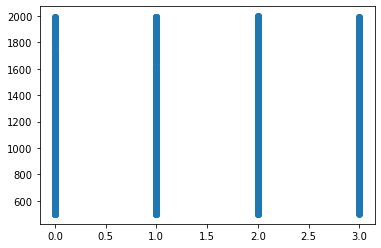

In [6]:
plt.scatter(df['PRICE_RANGE'],df['BATTERY_POWER'])

## Discrete features

In [7]:
discrete_features = [features for features in df if len(df[features].unique())<15]
discrete_features

['BT',
 'DUAL_SIM',
 '4G',
 'M_DEP',
 'N_CORES',
 '3G',
 'TOUCH_SCREEN',
 'WIFI',
 'PRICE_RANGE']

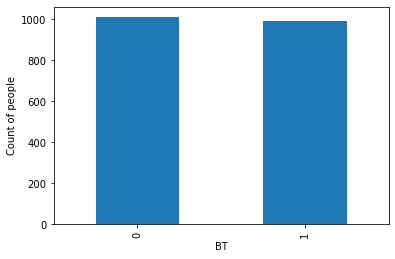

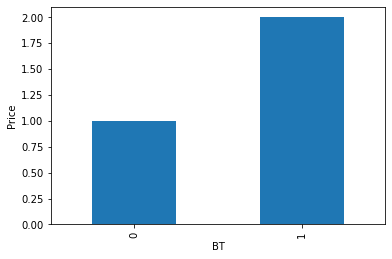

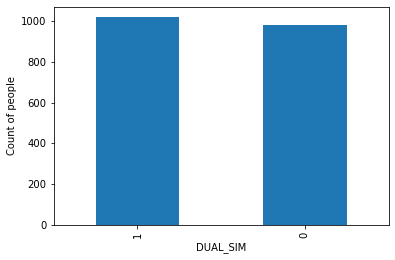

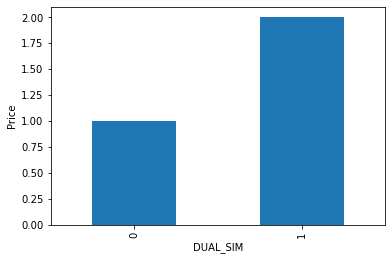

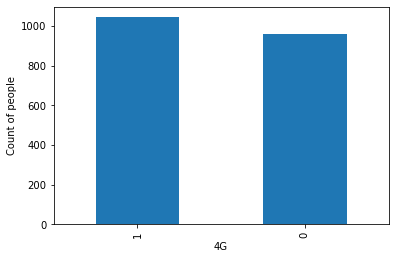

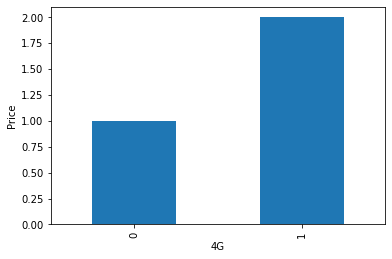

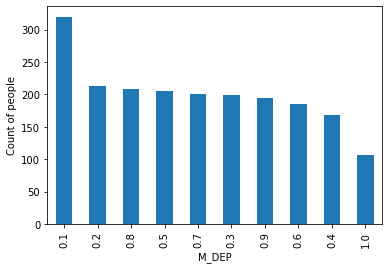

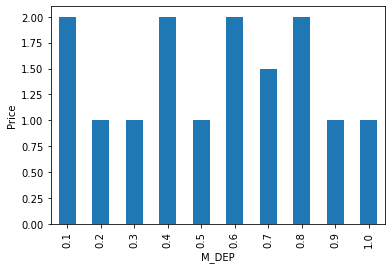

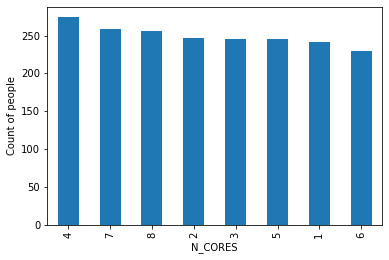

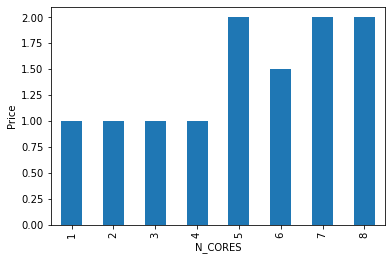

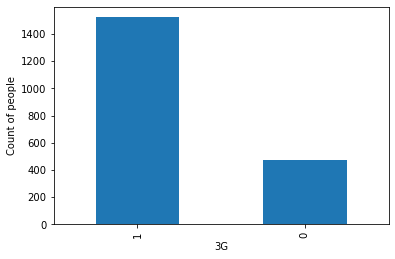

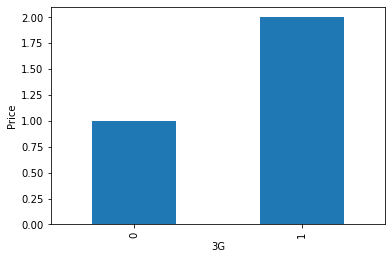

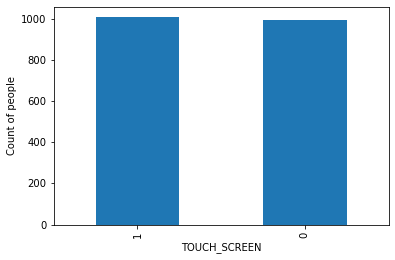

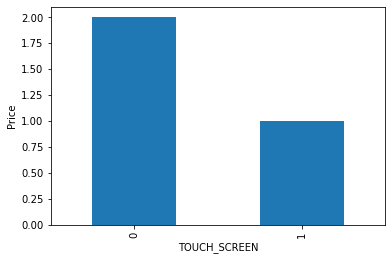

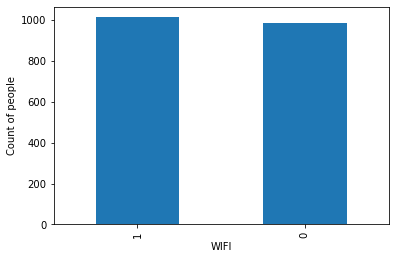

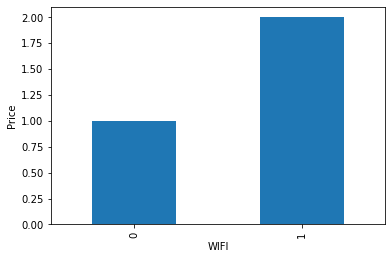

In [8]:
for features in discrete_features:
    if features != 'PRICE_RANGE':
        # Count of people
        df[features].value_counts().plot(kind='bar')
        plt.xlabel(features)
        plt.ylabel('Count of people')
        plt.show()

        # who's impacting more on target
        df.groupby(features)['PRICE_RANGE'].median().plot.bar()
        plt.xlabel(features)    
        plt.ylabel('Price')
        plt.show()

### If mobile has - 

    Bluethoot         - price more
    Count             - almost equal
    
    dual sim          - price more
    Count             - almost equal
    
    4G                - price more
    Count             - If 4G more

    Depth             - uneven distribution
    Count             - less depth more
    
    core in Proc more - Price more
    Count             - core=4 more
    
    3G                - Price more
    Count             - If 3G more  
    
    Touch screen      - Price less
    Count             - almost equal
    
    Wifi              - Price more
    Count             - Almost equal

In [9]:
continuous_features = [features for features in df if features not in discrete_features]
continuous_features

['BATTERY_POWER',
 'CLOCK_SPEED',
 'FC',
 'INT_MEMORY',
 'MOBILE_WT',
 'PC',
 'PX_HEIGHT',
 'PX_WIDTH',
 'RAM',
 'SC_H',
 'SC_W',
 'BATTERY_LIFE']

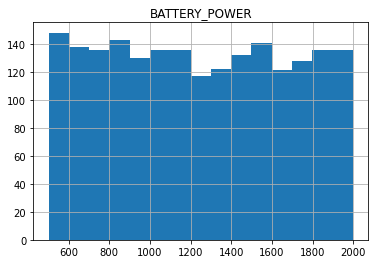

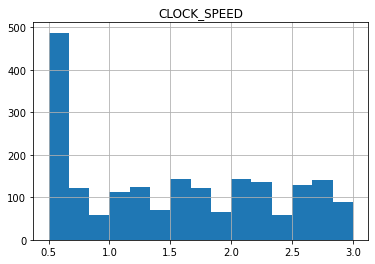

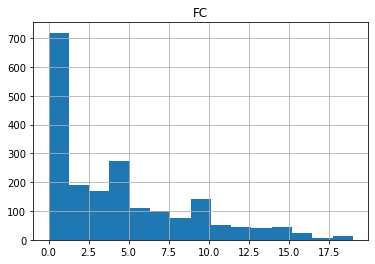

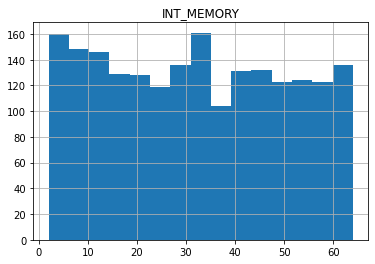

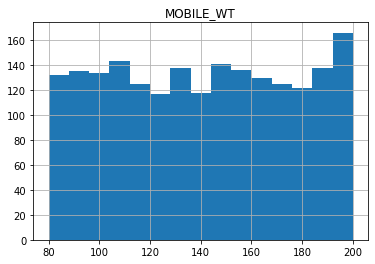

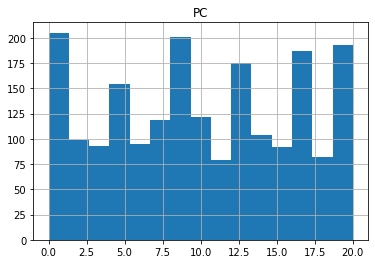

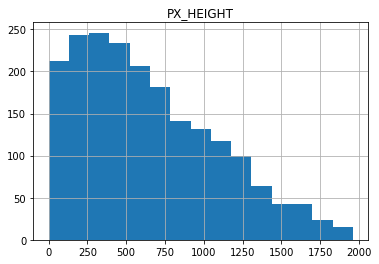

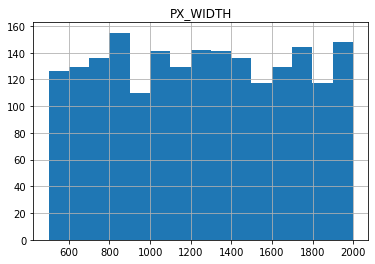

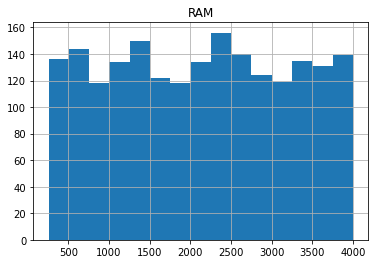

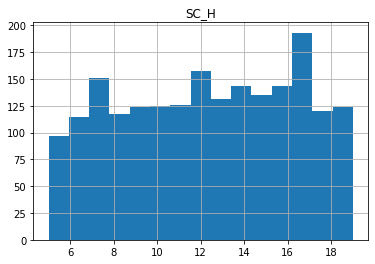

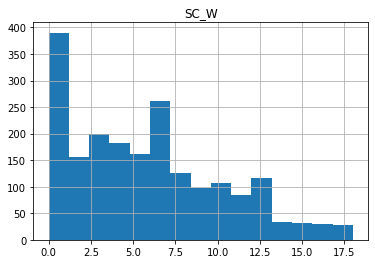

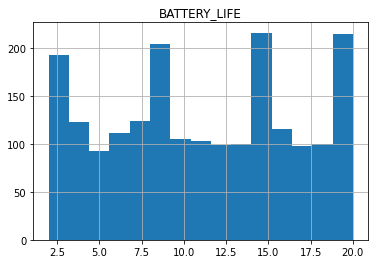

In [10]:
for features in continuous_features:
    df[features].hist(bins=15)
    plt.title(features)
    plt.show()

In [11]:
# <!--     more mobile has battery power b/w 300 to 600
#     more mobile has clock speed b/w 0.5 to 0.8
#     more mobile has front camera mp b/w 0 to 1.25
#     more mobile has internal memory b/w 3 to 5 and  32 to 35
#     more mobile has mobile weight b/w 190 to 200
#     more mobile has primary camera mp b/w 0 to 1.25
#     more mobile has pixel resolution height b/w 250 to 320
#     more mobile has pixel resolution width b/w 800 to 900
#     more mobile has RAM b/w 2250 to 2500
#     more mobile has screen Height b/w 16.2 to 17
#     more mobile has screen width b/w 0 to 1.2
#     more mobile has battery life b/w 13.7 to 15.1 and  -->

In [12]:
df.corr()

,BATTERY_POWER,BT,CLOCK_SPEED,DUAL_SIM,FC,4G,INT_MEMORY,M_DEP,MOBILE_WT,N_CORES,PC,PX_HEIGHT,PX_WIDTH,RAM,SC_H,SC_W,BATTERY_LIFE,3G,TOUCH_SCREEN,WIFI,PRICE_RANGE
BATTERY_POWER,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
BT,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
CLOCK_SPEED,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
DUAL_SIM,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
FC,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
4G,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
INT_MEMORY,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
M_DEP,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
MOBILE_WT,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
N_CORES,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
X = df.drop('PRICE_RANGE',axis=1)
y = df['PRICE_RANGE']

In [15]:
selected_features = SelectKBest(score_func=chi2,k=10)
feature = selected_features.fit(X,y)

In [16]:
Scores = pd.DataFrame(feature.scores_)
Columns = pd.DataFrame(X.columns)
score_df = pd.concat([Scores,Columns],axis=1)
score_df.columns = ['Score','Col']
score_df

,Score,Col
0,14129.866576,BATTERY_POWER
1,0.723232,BT
2,0.648366,CLOCK_SPEED
3,0.631011,DUAL_SIM
4,10.135166,FC
5,1.521572,4G
6,89.839124,INT_MEMORY
7,0.745820,M_DEP
8,95.972863,MOBILE_WT
9,9.097556,N_CORES


In [17]:
largest_columns = score_df.nlargest(10,'Score')
largest_columns

,Score,Col
13,931267.519053,RAM
11,17363.569536,PX_HEIGHT
0,14129.866576,BATTERY_POWER
12,9810.586750,PX_WIDTH
8,95.972863,MOBILE_WT
6,89.839124,INT_MEMORY
15,16.480319,SC_W
16,13.236400,BATTERY_LIFE
4,10.135166,FC
14,9.614878,SC_H


In [18]:
X_col = largest_columns['Col']
X_col

13              RAM
11        PX_HEIGHT
0     BATTERY_POWER
12         PX_WIDTH
8         MOBILE_WT
6        INT_MEMORY
15             SC_W
16     BATTERY_LIFE
4                FC
14             SC_H
Name: Col, dtype: object

In [19]:
X = X[X_col]
X

,RAM,PX_HEIGHT,BATTERY_POWER,PX_WIDTH,MOBILE_WT,INT_MEMORY,SC_W,BATTERY_LIFE,FC,SC_H
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


# Model Training

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [24]:
wcss = []
for neighbor in range(1,25):
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    wcss.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error Rate')

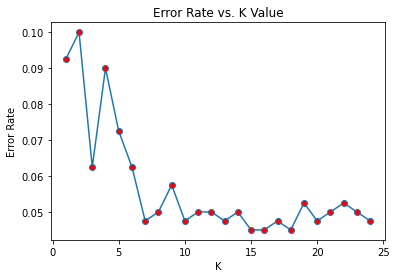

In [25]:
plt.plot(range(1,25),wcss,marker='o',mfc='r')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
data = [[2000,20,834,642,122,7,7,19,1,9]]
model.predict(data)[0]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1

In [41]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))

In [42]:
X

,RAM,PX_HEIGHT,BATTERY_POWER,PX_WIDTH,MOBILE_WT,INT_MEMORY,SC_W,BATTERY_LIFE,FC,SC_H
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18
